In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sympy as sp
import numpy as np
np.set_printoptions(suppress=True)

data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\碳排预测数据.csv")
print(data.columns)
system = data.copy()

Index(['时间', '常驻人口总量', '区域生产总值', '一次能源中化石的能源消费量', '一次能源中非化石的能源消费量',
       '二次能源的能源消费量', '化石能源发电的能源消费量', '非化石能源发电的能源消费量', '农林消费部门的碳排放量',
       '工业消费部门的碳排放量', '交通消费部门的碳排放量', '建筑消费部门的碳排放量', '居民生活消费部门的碳排放量',
       '能源供应部门的碳排放量', '碳排放量'],
      dtype='object')


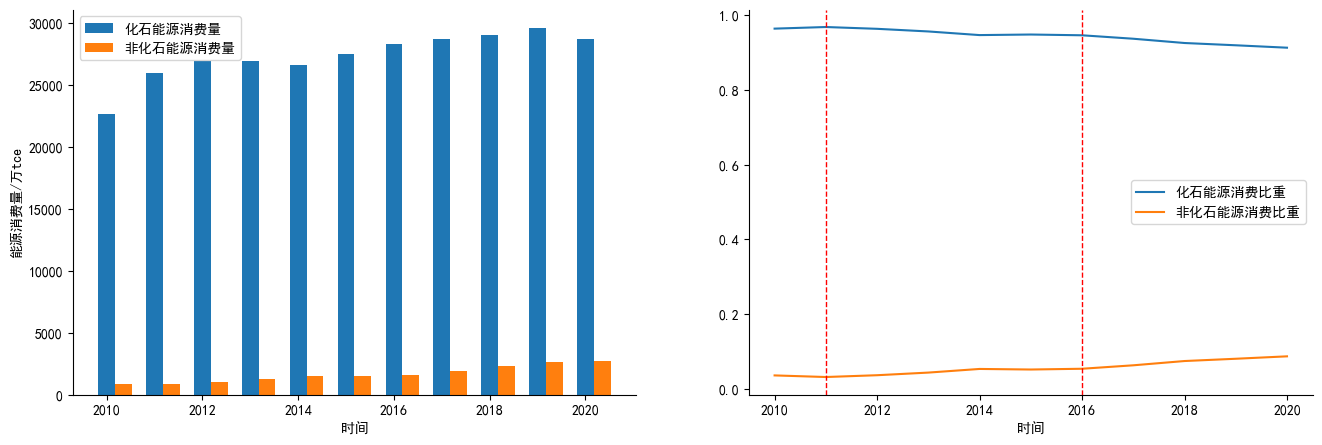

In [6]:
system['化石能源消费量'] = system['一次能源中化石的能源消费量']
system['非化石能源消费量'] = system['一次能源中非化石的能源消费量'] + system['二次能源的能源消费量']
system['化石能源消费比重'] = system['化石能源消费量'] / (system['化石能源消费量'] + system['非化石能源消费量'])
system['非化石能源消费比重'] = system['非化石能源消费量'] / (system['化石能源消费量'] + system['非化石能源消费量'])

import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题

fig = plt.figure(figsize=(16, 5))
(ax1, ax2) = fig.subplots(1, 2)

bar_width=0.35
time = system['时间']
y1 = system['化石能源消费量']
y2 = system['非化石能源消费量']

ax1.bar(time, y1, width=bar_width, label='化石能源消费量')
ax1.bar([i+bar_width for i in time], y2, width=bar_width, label='非化石能源消费量')
ax1.legend(loc=0)
ax1.spines['right'].set_color(None)
ax1.spines['top'].set_color(None)
ax1.set_xlabel('时间')
ax1.set_ylabel('能源消费量/万tce')

time = system['时间']
y1 = system['化石能源消费比重']
y2 = system['非化石能源消费比重']
ax2.plot(time, y1, label='化石能源消费比重')
ax2.plot(time, y2, label='非化石能源消费比重')
ax2.legend(loc=5)
ax2.spines['right'].set_color(None)
ax2.spines['top'].set_color(None)
ax2.axvline(x=time[1], color='red', linestyle='--', linewidth=1)
ax2.axvline(x=time[6], color='red', linestyle='--', linewidth=1)
ax2.set_xlabel('时间')

plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\化石能源与非化石能源消费对比图.jpg", dpi=500)